In [1]:
using PyPlot, Interact, Distributions;  # rerun to remove distracting and useless warnings

  likely near /Users/edelman/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /Users/edelman/.julia/v0.4/Interact/src/IJulia/setup.jl:157


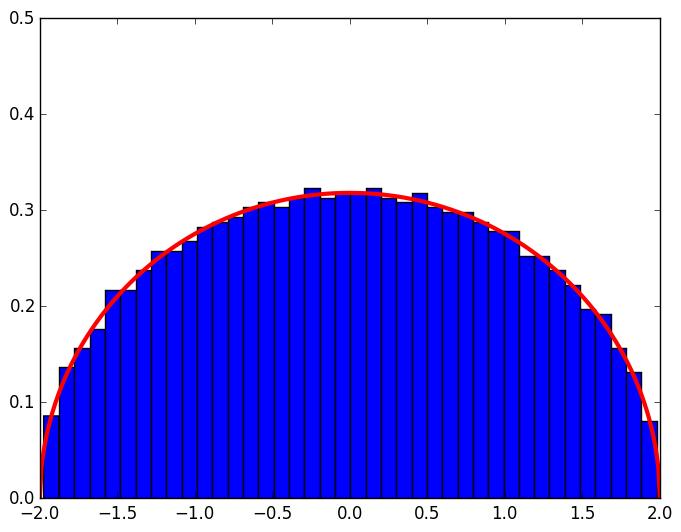

0.576256 seconds (46 allocations: 92.287 MB, 1.17% gc time)


In [14]:
# Semicircle Law
n=2000
A=randn(n,n)
@time e=eigvals(A+A')/√(2n)
plt[:hist](e,40,normed=true)
x=-2:.01:2
plot(x,(1/(2π))*√(4-x.^2),"r",linewidth=3)
axis([-2; 2; 0; .5]);

In [59]:
function TridiagonalModel(;n=20,β=1)
    d=randn(n)*√2
    s=[rand(Chi(β*j)) for j=(n-1):-1:1]
    eigvals(SymTridiagonal(d,s))/√(n*β)
end

TridiagonalModel (generic function with 1 method)

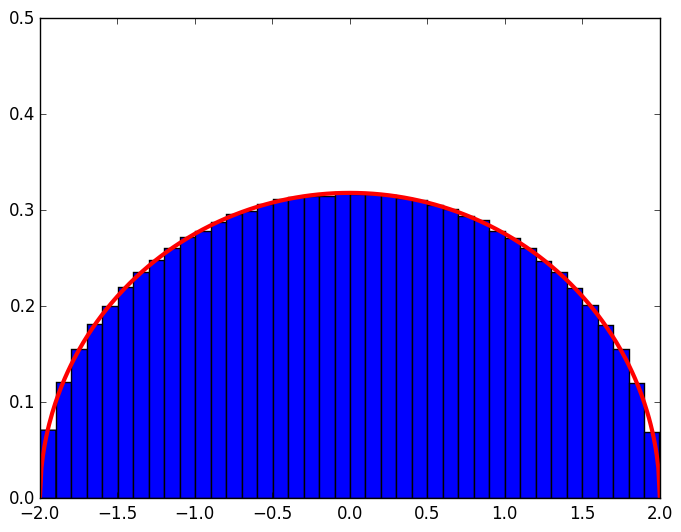

In [4]:
# Semicircle Law with much less computation
@time e=TridiagonalModel(n=10000,β=2)
plt[:hist](e,40,normed=true)
x=-2:.01:2
plot(x,(1/(2π))*√(4-x.^2),"r",linewidth=3)
axis([-2; 2; 0; .5]);

# Code for problem 1

In [77]:
function histogram_moment(;n=20,β=1,k=2,t=10_000,normalplot=true)
v=zeros(t)
for i=1:t
    d=randn(n)*√2
    s=[rand(Chi(β*j)) for j=(n-1):-1:1]
        e=eigvals(SymTridiagonal(d,s))/√(n*β)
    #   e=eigvals(SymTridiagonal(d,s))/√2
    v[i]=mean(e.^k)
end
   
μ=mean(v); σ=std(v)
    #plotting
plt[:hist](v,40,normed=true);
title("k=$k  mean=$(round(μ,2))  std=$(round(σ,2))")
x=μ+σ*(-3:.01:3)
     if(normalplot)
plot(x, (1/(σ*√(2π)))*exp(-(x-μ).^2/(2*σ^2)),"r",linewidth=3)
    end
end

histogram_moment (generic function with 1 method)

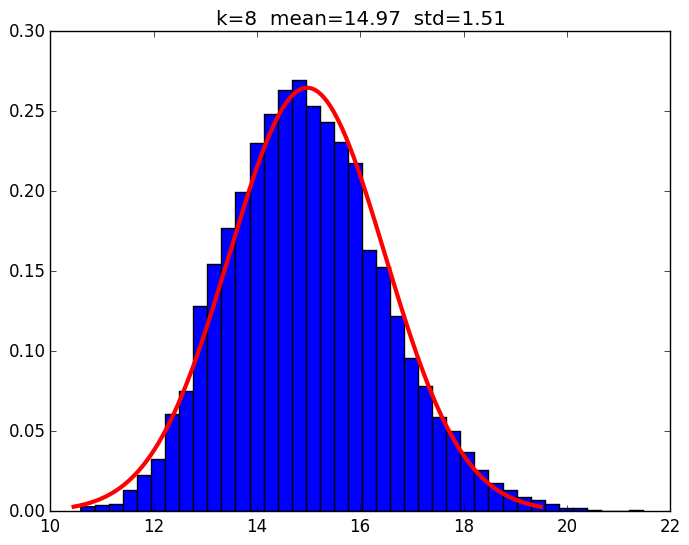

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320b7efd0>

In [12]:
histogram_moment(n=100,k=8)

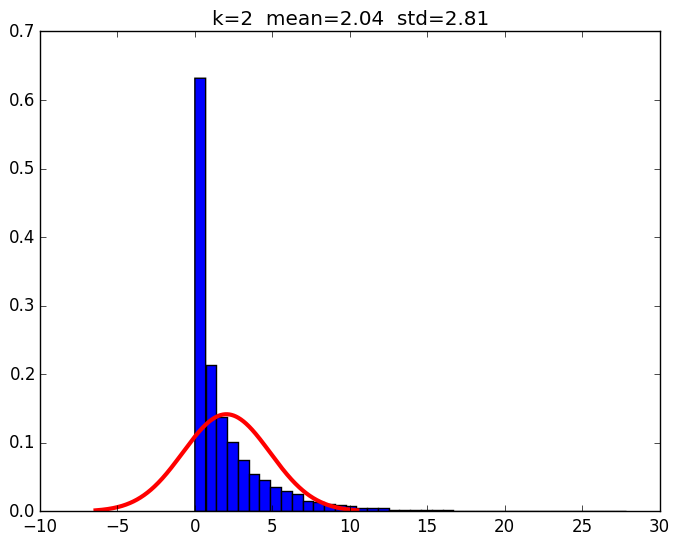

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x345281b70>

In [260]:
histogram_moment(n=1)

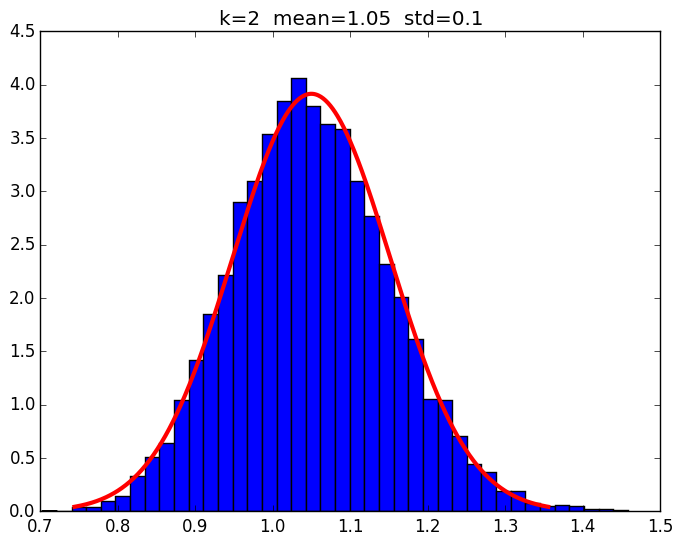

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x345733860>

In [262]:
histogram_moment(β=1)

Interact.Slider{Int64}([Reactive.Input{Int64}] 6,"m",6,2:10)

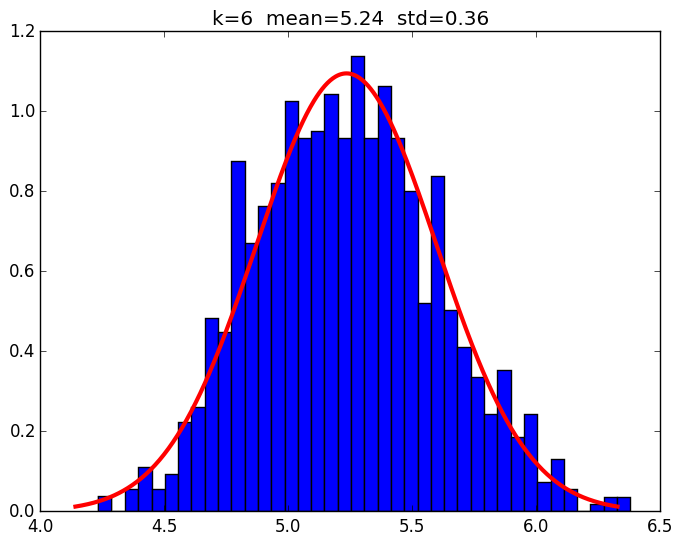

In [112]:
f=figure()
@manipulate for m=2:10; withfig(f) do
        histogram_moment(n=100,t=1000,k=m)
    end
end

## Code for Problem 2

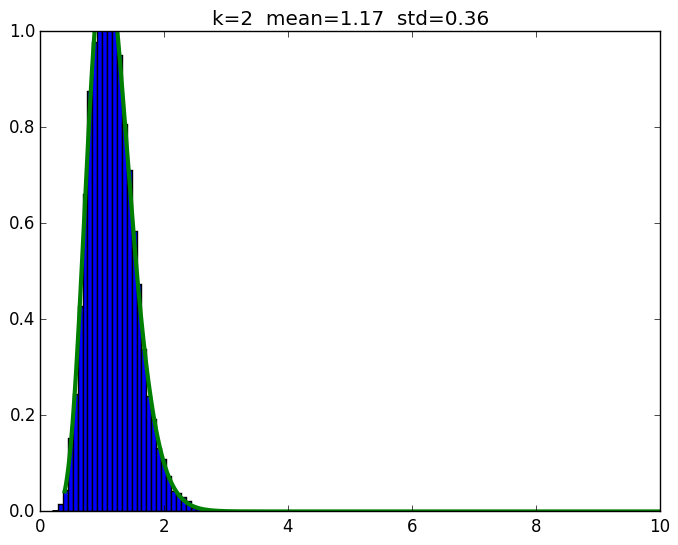

4-element Array{Int64,1}:
  0
 10
  0
  1

In [88]:
n=6
β=1
histogram_moment(n=n,β=β,normalplot=false)
d  = n*(n-1)*β/2+n
x=.4:.01:10
c =n^2*β/2
xx = x *c
plot(x,c*xx.^(d/2-1).*exp(-xx/2)/(2^(d/2))/gamma(d/2),linewidth=3,"g")
axis([0;10;0;1])

#### plot(x,n^2/2*x.^(1).*exp(-x/2)/2^(j/2),"g")

In [217]:
d

25

In [218]:
n

5

In [19]:
d

1

In [44]:
4/sqrt(2)

2.82842712474619